In [1]:
import spacy
from spacy.symbols import nsubj, amod, VERB, ADJ, ADV
import itertools
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nlp = spacy.load("en_core_web_md")

In [3]:
# Load text into Spacy (this takes a while)
with open("./handmaids-tale-cleaned.txt") as f:
    handmaids_tale = nlp(f.read())

In [4]:
FEMALE_WORDS = {
    "woman", "women", "handmaid", "handmaids", "mother",
    "mothers", "girl", "girls", "martha", "marthas", "daughter",
    "daughters", "wife", "wives", "econowife", "econowives",
    "aunt", "she", "we", "I"
}
FEMALE_NAMES = {
    "cora", "rita", "janine", "moira", "serena"
}
def is_female(token):
    token_str = str(token).lower()
    if token_str in FEMALE_WORDS:
        return True
    elif token_str == "he":
        return False
    if token.ent_iob_ == "B" or token.ent_iob == "I":
        if token.ent_type_ == "PERSON":
            if token_str.startswith("of"):
                return True
            if token_str in FEMALE_NAMES:
                return True
    return False

In [5]:
MALE_WORDS = {
    "man", "men", "angels", "guard", "guards",
    "commander", "he"
}
MALE_NAMES = {
    "fred", "luke", "nick", "warren"
}
def is_male(token):
    token_str = str(token).lower()
    if token_str in MALE_WORDS:
        return True
    elif token_str in FEMALE_WORDS:
        return False
    if token.ent_iob_ == "B" or token.ent_iob == "I":
        if token.ent_type_ == "PERSON":
            if token_str in MALE_NAMES:
                return True
    return False

In [6]:
def count_descriptors(doc, subject_criterion):
    descriptors = collections.Counter()
    for possible_descriptor in doc:
        if not possible_descriptor.dep == amod:
            continue
        if subject_criterion(possible_descriptor.head):
            descriptors[str(possible_descriptor).lower()] += 1
    return descriptors

In [7]:
def count_verbs(doc, subject_criterion):
    verbs = collections.Counter()
    for possible_subject in handmaids_tale:
        if not possible_subject.dep == nsubj:
            continue
        if subject_criterion(possible_subject) and possible_subject.head.pos == VERB:
            verbs[str(possible_subject.head.lemma_)] += 1
    return verbs

In [8]:
female_verbs = count_verbs(handmaids_tale, is_female)
male_verbs = count_verbs(handmaids_tale, is_male)
female_descriptors = count_descriptors(handmaids_tale, is_female)
male_descriptors = count_descriptors(handmaids_tale, is_male)

In [9]:
def make_unique_counter(target_counter, other_counter):
    new_counter = collections.Counter()
    for key in target_counter:
        if key not in other_counter:
            new_counter[key] = target_counter[key]
    return new_counter

In [10]:
def normalize_counter(counter):
    total = sum(counter.values())
    return collections.Counter({key: counter[key]/total for key in counter})

In [11]:
unique_female_verbs = make_unique_counter(female_verbs, male_verbs)
unique_female_verbs = normalize_counter(unique_female_verbs)
most_common_female_verbs = unique_female_verbs.most_common(20)
most_common_female_verbs

[('learn', 0.022598870056497175),
 ('pass', 0.01977401129943503),
 ('cry', 0.01977401129943503),
 ('keep', 0.01694915254237288),
 ('avoid', 0.014124293785310734),
 ('set', 0.014124293785310734),
 ('pretend', 0.014124293785310734),
 ('hug', 0.014124293785310734),
 ('sleep', 0.011299435028248588),
 ('disapprove', 0.011299435028248588),
 ('bother', 0.011299435028248588),
 ('intend', 0.011299435028248588),
 ('chant', 0.011299435028248588),
 ('throw', 0.011299435028248588),
 ('scream', 0.011299435028248588),
 ('hang', 0.011299435028248588),
 ('exchange', 0.00847457627118644),
 ('envy', 0.00847457627118644),
 ('spend', 0.00847457627118644),
 ('afford', 0.00847457627118644)]

In [12]:
unique_male_verbs = make_unique_counter(male_verbs, female_verbs)
unique_male_verbs = normalize_counter(unique_male_verbs)
most_common_male_verbs = unique_male_verbs.most_common(20)
most_common_male_verbs

[('drive', 0.030927835051546393),
 ('mind', 0.030927835051546393),
 ('act', 0.020618556701030927),
 ('wink', 0.020618556701030927),
 ('blush', 0.020618556701030927),
 ('polish', 0.020618556701030927),
 ('pat', 0.020618556701030927),
 ('buy', 0.020618556701030927),
 ('figure', 0.020618556701030927),
 ('appear', 0.020618556701030927),
 ('wish', 0.020618556701030927),
 ('shake', 0.020618556701030927),
 ('borrow', 0.020618556701030927),
 ('lead', 0.020618556701030927),
 ('caress', 0.010309278350515464),
 ('trade', 0.010309278350515464),
 ('rate', 0.010309278350515464),
 ('violate', 0.010309278350515464),
 ('invade', 0.010309278350515464),
 ('stoop', 0.010309278350515464)]

In [13]:
unique_female_descriptors = make_unique_counter(female_descriptors, male_descriptors)
unique_female_descriptors = normalize_counter(unique_female_descriptors)
most_common_female_descriptors = unique_female_descriptors.most_common(20)
most_common_female_descriptors

[('little', 0.05),
 ('new', 0.05),
 ('pregnant', 0.0375),
 ('several', 0.0375),
 ('veil', 0.025),
 ('unknown', 0.025),
 ('dead', 0.025),
 ('kneel', 0.025),
 ('seat', 0.025),
 ('outside', 0.025),
 ('different', 0.025),
 ('watch', 0.0125),
 ('nondescript', 0.0125),
 ('blue', 0.0125),
 ('dumpy', 0.0125),
 ('green', 0.0125),
 ('single', 0.0125),
 ('large', 0.0125),
 ('pretty', 0.0125),
 ('strange', 0.0125)]

In [14]:
unique_male_descriptors = make_unique_counter(male_descriptors, female_descriptors)
unique_male_descriptors = normalize_counter(unique_male_descriptors)
most_common_male_descriptors = unique_male_descriptors.most_common(20)
most_common_male_descriptors

[('face', 0.09090909090909091),
 ('first', 0.09090909090909091),
 ('grown', 0.045454545454545456),
 ('upright', 0.045454545454545456),
 ('clothe', 0.045454545454545456),
 ('hanged', 0.045454545454545456),
 ('sterile', 0.045454545454545456),
 ('semiretired', 0.045454545454545456),
 ('genial', 0.045454545454545456),
 ('solitary', 0.045454545454545456),
 ('hang', 0.045454545454545456),
 ('glossy', 0.045454545454545456),
 ('devoid', 0.045454545454545456),
 ('less', 0.045454545454545456),
 ('look', 0.045454545454545456),
 ('last', 0.045454545454545456),
 ('particular', 0.045454545454545456),
 ('cut', 0.045454545454545456),
 ('unkind', 0.045454545454545456),
 ('wreck', 0.045454545454545456)]

Now, we plot the results.

In [15]:
female_verbs, female_verb_frequencies = zip(*most_common_female_verbs)
female_verbs = np.array(female_verbs)
female_verb_frequencies = np.array(female_verb_frequencies)

male_verbs, male_verb_frequencies = zip(*most_common_male_verbs)
male_verbs = np.array(male_verbs)
male_verb_frequencies = np.array(male_verb_frequencies)

female_descriptors, female_descriptor_frequencies = zip(*most_common_female_descriptors)
female_descriptors = np.array(female_descriptors)
female_descriptor_frequencies = np.array(female_descriptor_frequencies)

male_descriptors, male_descriptor_frequencies = zip(*most_common_male_descriptors)
male_descriptors = np.array(male_descriptors)
male_descriptor_frequencies = np.array(male_descriptor_frequencies)

In [16]:
sns.set()

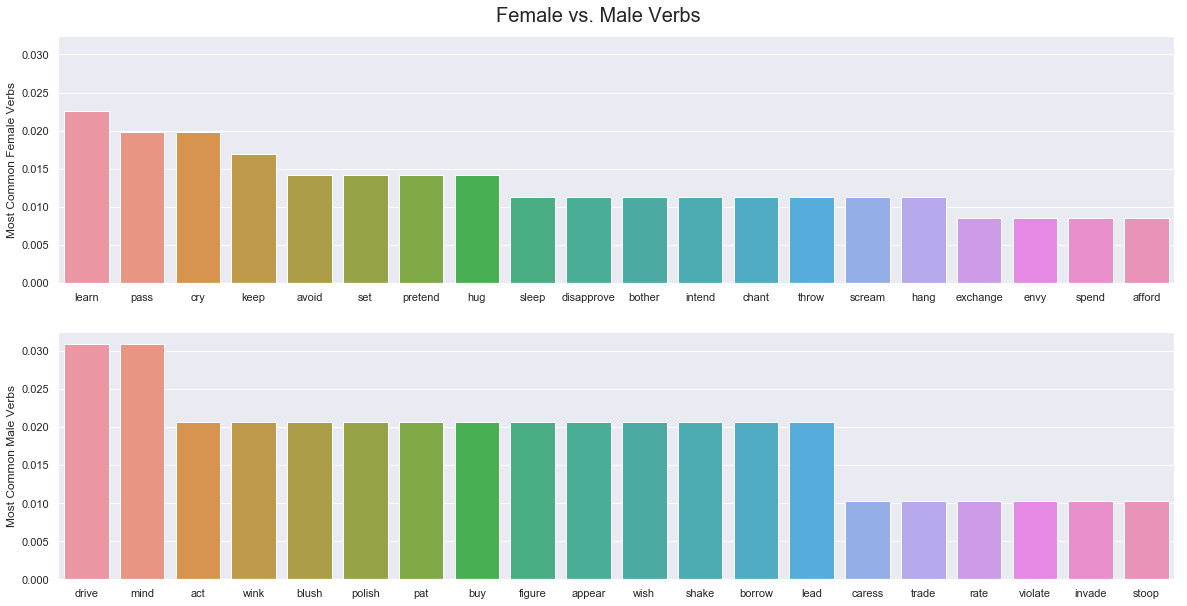

In [20]:
verb_figure, axes = plt.subplots(2, 1, figsize=(20, 10), sharey=True)
verb_figure.suptitle("Female vs. Male Verbs", y=0.92, size=20)

sns.barplot(x=female_verbs, y=female_verb_frequencies, ax=axes[0])
axes[0].set_ylabel("Most Common Female Verbs")

sns.barplot(x=male_verbs, y=male_verb_frequencies, ax=axes[1])
axes[1].set_ylabel("Most Common Male Verbs")
plt.show(verb_figure)

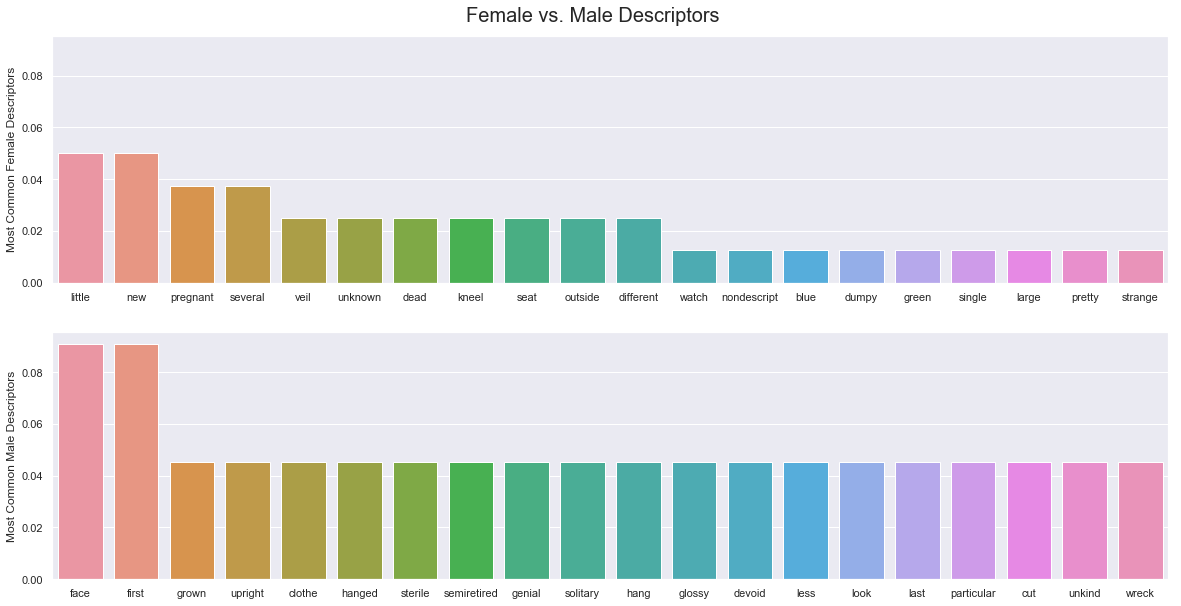

In [21]:
descriptor_figure, axes = plt.subplots(2, 1, figsize=(20, 10), sharey=True)
descriptor_figure.suptitle("Female vs. Male Descriptors", y=0.92, size=20)

sns.barplot(x=female_descriptors, y=female_descriptor_frequencies, ax=axes[0])
axes[0].set_ylabel("Most Common Female Descriptors")

sns.barplot(x=male_descriptors, y=male_descriptor_frequencies, ax=axes[1])
axes[1].set_ylabel("Most Common Male Descriptors")
plt.show(descriptor_figure)

In [22]:
verb_figure.savefig("handmaid-verbs.jpg", dpi=300)
descriptor_figure.savefig("handmaid_descriptor.jpg", dpi=300)